In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# colab_dir = '/content/drive/MyDrive/Colab Notebooks'
colab_dir = 'models'

In [ ]:
# !pip install nltk pythainlp scikit-learn==1.2.2 scikeras==0.10.0

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Embedding
# from scikeras.wrappers import KerasClassifier
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM

from sklearn.metrics import accuracy_score


from pythainlp.corpus import thai_stopwords
from pythainlp import word_tokenize

In [4]:
from scikeras.wrappers import KerasClassifier

In [6]:
tourism_reviews_en = pd.read_csv('dataset/reviews/TripAdvisor_reviews_EN.csv')
tourism_reviews_en

,Unnamed: 0,helpful_votes,location_id,lang,review_id,review,review_subject,trip_type,travel_date,rating,location_name,province,place_id
0,0,0,2209612,en,953596359,Besides elegant grand palace and wat pra kaew ...,"The place is nearby grand palace, in the area ...",Family,2024-05-31,5,Wat Ratchabophit,Bangkok,P03013220
1,1,0,2209612,en,938998692,This is one of the last big king temples of Ba...,Nice Wat,Solo travel,2024-02-29,4,Wat Ratchabophit,Bangkok,P03013220
2,2,6,2209612,en,933065689,"It is beautiful, clean and free to enter. Both...",Nice views,Solo travel,2023-12-31,4,Wat Ratchabophit,Bangkok,P03013220
3,3,0,2209612,en,885904967,Wat Ratchabophit is a Buddhist temple located ...,Wat Ratchabophit - a temple characterized by u...,Couples,2022-10-31,5,Wat Ratchabophit,Bangkok,P03013220
4,4,4,2209612,en,782967555,Wat Ratchabophit is a historic royal temple bu...,"Beautiful, peaceful",NONE,2021-01-31,5,Wat Ratchabophit,Bangkok,P03013220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5904,0,1831068,en,888281929,Is quite far from Korat Town or main highway. ...,Can visit.. depends on individual,Family,2023-04-30,3,Prasat Puay Noi,Nonthaburi,P03013503
5905,5905,4,1831068,en,752115552,Prasat Pueai Noi is claimed to be the biggest ...,"Small, Isolated Khmer Sanctuary",NONE,2019-09-30,3,Prasat Puay Noi,Nonthaburi,P03013503
5906,5906,0,1831068,en,693354319,I think this place is claimed to be the oldest...,A sense of ancient times..,Friends getaway,2019-06-30,4,Prasat Puay Noi,Nonthaburi,P03013503
5907,5907,1,1831068,en,573376614,The compound comprises three brick buildings o...,Another Angkor Wat,Solo travel,2018-04-30,4,Prasat Puay Noi,Nonthaburi,P03013503


In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ittichaiboonyarakthunya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ittichaiboonyarakthunya/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords

custom_stopwords = set(stopwords.words('english'))
print(custom_stopwords)

{"weren't", 'or', 'hers', 'ma', 'after', 'don', 'didn', "haven't", 'y', 'were', 'are', 'too', "you're", 't', 're', 'in', "won't", "wouldn't", 'a', 'from', 'nor', 'most', 'am', 'doesn', 'each', 'very', 'yourselves', 'has', 'doing', 'my', 'himself', 'ourselves', 'than', 'why', "doesn't", 'only', 'will', "needn't", 'where', "don't", 'between', 'we', 'll', 'shouldn', 'over', "hasn't", 'under', 'your', 'those', "you'll", 'down', 'mightn', 'shan', 'that', 'itself', 'having', "wasn't", 'the', 'how', "that'll", 's', 'now', 'yourself', 'she', 'won', "mustn't", 'myself', 'of', 'ain', 'him', "you've", 'he', 'them', "couldn't", 'with', 'through', 'hasn', "shouldn't", 'once', 'weren', 'me', 'should', 'is', 'o', 've', 'for', 'any', 'isn', 'hadn', 'further', 'you', 'what', 'just', 'their', 'her', 'they', 'other', 'some', 'i', 'again', 'all', 'wouldn', 'whom', 'can', "it's", 'because', 'ours', 'aren', "mightn't", 'theirs', 'during', 'do', 'few', 'be', 'no', 'our', 'm', 'at', 'haven', 'it', 'here', 'wa

In [15]:

def preprocess_text(text):
    text = text.lower()
    
    tokens = nltk.word_tokenize(text)
    
    tokens = [word if word not in custom_stopwords else '<OOV>' for word in tokens if word.isalnum() or word in custom_stopwords]

    return " ".join(tokens)


In [26]:
nltk.download('punkt', download_dir='models/nltk_data')



[nltk_data] Downloading package punkt to models/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
import nltk.data
nltk.data.path.append('/models/nltk_data')

In [20]:
tourism_reviews_en['review']

0       Besides elegant grand palace and wat pra kaew ...
1       This is one of the last big king temples of Ba...
2       It is beautiful, clean and free to enter. Both...
3       Wat Ratchabophit is a Buddhist temple located ...
4       Wat Ratchabophit is a historic royal temple bu...
                              ...                        
5904    Is quite far from Korat Town or main highway. ...
5905    Prasat Pueai Noi is claimed to be the biggest ...
5906    I think this place is claimed to be the oldest...
5907    The compound comprises three brick buildings o...
5908    Fully recommend this to the genuine history bu...
Name: review, Length: 5909, dtype: object

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
# Tokenization parameters
vocab_size = 10000  # Vocabulary size to consider
max_length = 50     # Maximum length of each sequence
trunc_type = 'post'
padding_type = 'post'
oov_token = "<OOV>"

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(tourism_reviews_en['cleaned_review'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(tourism_reviews_en['cleaned_review'])

# Pad the sequences to ensure uniform input size
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Preview the padded sequences
print(padded_sequences)


KeyError: 'cleaned_review'

In [12]:
# Embedding parameters
embedding_dim = 16

# Define the embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_length)

# Get the embedded vectors for the padded sequences
embedded_vectors = embedding_layer(padded_sequences)

# Convert to numpy array for further processing
embedded_vectors = np.array(embedded_vectors)

# Preview the embedded vectors
print(embedded_vectors.shape)  # Output: (number of reviews, max_length, embedding_dim)


(5909, 50, 16)


In [46]:

# Save the array to a file
# np.save(f'{colab_dir}/embedding_vectors.npy', embedded_vectors)

# Later, you can load the array like this
loaded_vectors = np.load(f'{colab_dir}/embedding_vectors.npy')

# print(loaded_vectors.shape)  # Verify the shape

In [13]:
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size,
                                            output_dim=embedding_dim,
                                            input_length=max_length)

# Define the model
model = tf.keras.Sequential([
    embedding_layer,
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 16.0 MB/s eta 0:00:00


In [15]:
# model.save(f"{colab_dir}/en_model.h5")

# Load the model
from tensorflow.keras.models import load_model
model = load_model(f'{colab_dir}/en_model.h5')

In [ ]:
import visualkeras

# Visualize the model
visualkeras.layered_view(model).show()

In [14]:
# Example dataset loading (replace with actual data loading code)
# Assuming 'features' is your feature matrix and 'target' is your target variable
X = np.random.rand(1000, 100)  # Example feature matrix (1000 samples, 100 features)
y = np.random.randint(0, 10, 1000)  # Example target variable (10 classes)

# Encode target labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature scaling (optional, depends on the model)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Results dictionary to store model performance
results = {
    'RandomForest': [],
    'SVM': [],
    'MLP': [],
    'CNN': [],
    'LSTM': [],
    'CNN_LSTM': []
}

In [15]:
def run_lstm(X_train, y_train, X_val, y_val, vocab_size, max_length, embedding_dim=128, lstm_units=128, dropout_rate=0.2):
    """
    Runs an LSTM model on the given training and validation data.

    Parameters:
    - X_train: Training data features
    - y_train: Training data labels
    - X_val: Validation data features
    - y_val: Validation data labels
    - vocab_size: Size of the vocabulary
    - max_length: Maximum length of sequences
    - embedding_dim: Dimensionality of the embedding layer (default: 128)
    - lstm_units: Number of units in the LSTM layer (default: 128)
    - dropout_rate: Dropout rate for regularization (default: 0.2)

    Returns:
    - accuracy: Accuracy of the model on the validation data
    - y_pred: Predictions made by the model on the validation data
    """
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping], verbose=1)

    # Make predictions
    y_pred_prob = model.predict(X_val)
    y_pred = np.round(y_pred_prob).astype(int).flatten()  # Convert probabilities to binary class labels

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy, y_pred, model

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

vocab_size = 10000  # Example vocabulary size
max_length = 50     # Example sequence length

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

en_trained = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.0950 - loss: -1.7854
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0798 - loss: -15.1204
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0851 - loss: -41.5763
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0910 - loss: -87.1938
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0995 - loss: -167.0479
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0837 - loss: -267.2260
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0785 - loss: -464.8150
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0885 - loss: -653.9828
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0830 - loss: -1002.5706
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0814 - loss: -1427.9465


In [24]:
# Make predictions on the validation set
y_pred_prob = model.predict(X_val)
y_pred = np.round(y_pred_prob).astype(int).flatten()  # Convert probabilities to binary class labels
y_pred_prob


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_absolute_error, mean_squared_error, confusion_matrix
import numpy as np

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Calculate F1 score
f1 = f1_score(y_val, y_pred, average='weighted')

# Calculate precision
precision = precision_score(y_val, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_val, y_pred, average='weighted')


# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_val, y_pred_prob)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val, y_pred_prob)

# Calculate root mean square error (RMSE)
rmse = np.sqrt(mse)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.11
F1 Score: 0.0218018018018018
Precision: 0.0121
Recall: 0.11
MAE: 3.675
MSE: 20.205
RMSE: 4.494997219131509


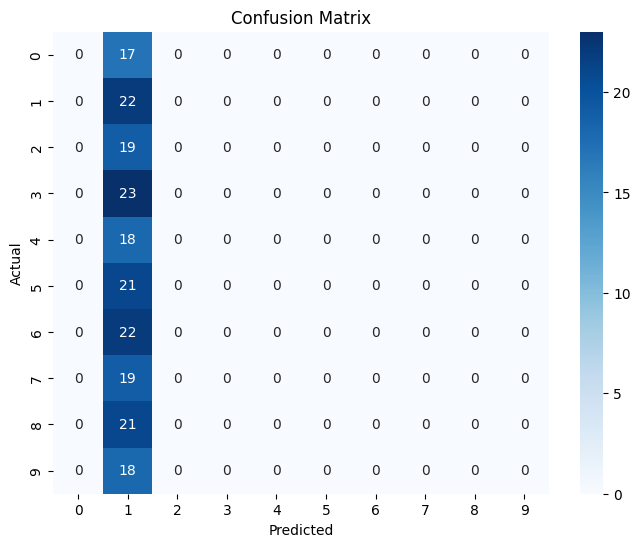

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'y_pred_prob'

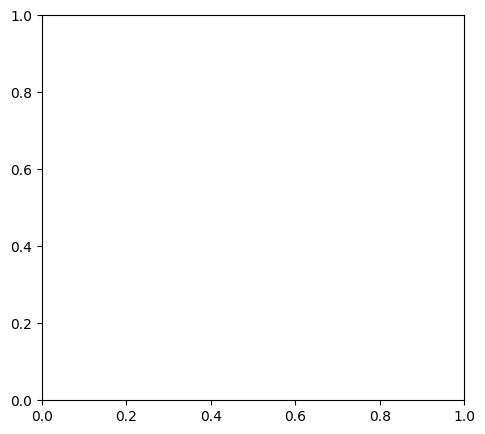

In [23]:
# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(y_pred_prob.y_pred_prob['accuracy'], label='Train Accuracy')
plt.plot(y_pred_prob.y_pred_prob['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(y_pred_prob.y_pred_prob['loss'], label='Train Loss')
plt.plot(y_pred_prob.y_pred_prob['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [17]:
def build_mlp(input_shape):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [18]:
def build_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
def build_lstm(input_shape):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=input_shape))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
def build_cnn_lstm(input_shape):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=input_shape))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
# Model Instances
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='rbf', probability=True),
    # 'MLP': KerasClassifier(build_fn=build_mlp, input_shape=X_scaled.shape[1], epochs=10, batch_size=32, verbose=0),
    'CNN': KerasClassifier(build_fn=build_cnn, input_shape=X_scaled.shape[1], epochs=10, batch_size=32, verbose=0),
    'LSTM': KerasClassifier(build_fn=build_lstm, input_shape=X_scaled.shape[1], epochs=10, batch_size=32, verbose=0),
    # 'CNN_LSTM': KerasClassifier(build_fn=build_cnn_lstm, input_shape=X_scaled.shape[1], epochs=10, batch_size=32, verbose=0)
}

In [ ]:
!pip install --upgrade scikit-learn scikeras tensorflow


In [31]:
# Cross-Validation and Training
for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Train and evaluate each model
    for model_name, model in models.items():
        if model_name in ['CNN', 'LSTM']:
            model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)], verbose=0)
            y_pred = model.predict(X_val)
            y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

        accuracy = accuracy_score(y_val, y_pred)
        results[model_name].append(accuracy)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  )


AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'

In [ ]:
# Calculate the mean accuracy for each model
for model_name, accuracies in results.items():
    mean_accuracy = np.mean(accuracies)
    print(f'{model_name} Mean Accuracy: {mean_accuracy:.4f} (+/- {np.std(accuracies):.4f})')